In [324]:
# Don't change this cell; just run it. 
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import random
plt.style.use('fivethirtyeight')
import matplotlib.ticker as ticker
from PIL import Image
import urllib

In [77]:
#headers = pd.read_csv("Headers.csv", header = None).transpose()
colName = ["Date","Day","Comp","Round","Venue","Result","Squad","Opponent","Start","Pos","Min","TotalCmp",
           "TotalAtt",'TotalCmp%','TotalTotDist','TotalPrgDist','ShortCmp','ShortAtt','ShortCmp%','MediumCmp',
           "MediumAtt","MediumCmp%",'LongCmp','LongAtt','LongCmp%','Ast','xA','KP','1/3','PPA','CrsPA','Prog','Match Report']
l22=pd.read_csv("l22.csv").dropna()
l22.columns = colName
l21=pd.read_csv("l21.csv").dropna()
l21.columns = colName
l20=pd.read_csv("l20.csv").dropna()
l20.columns = colName
l19=pd.read_csv("l19.csv").dropna()
l19.columns = colName
l18=pd.read_csv("l18.csv").dropna()
l18.columns = colName

#l22.reset_index().drop(columns=["index"])
#l22.columns = l22.columns.map('_'.join)
#l22.rename(columns=lambda x: x[:10], inplace=True)
#l22.columns = l22.columns.map(lambda h: '  '.join(h).replace('Unnamed:*' where '*' = '9', ' '))
#l22.reset_index()


In [78]:
lodeiro = pd.merge(l22, l21, how='outer')
lodeiro = pd.merge(lodeiro, l20, how='outer')
lodeiro = pd.merge(lodeiro, l19, how='outer')
lodeiro = pd.merge(lodeiro, l18, how='outer')
#lodeiro["mday"] = lodeiro["Date"]
from datetime import datetime
lodeiro["Year"] = lodeiro["Date"]
for i in range(len(lodeiro)):
        lodeiro["Year"][i] = lodeiro["Date"][i][0:4]
        lodeiro["Date"][i] = datetime.strptime(lodeiro["Date"][i], '%Y-%m-%d')
        #lodeiro["mday"][i] = datetime.strptime(lodeiro["mday"][i][5:], '%m-%d')
lodeiro = lodeiro.reset_index().drop(columns=["index"])


C:\Users\matan\AppData\Local\Temp/ipykernel_31888/3966015453.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lodeiro["Year"][i] = lodeiro["Date"][i][0:4]
C:\Users\matan\AppData\Local\Temp/ipykernel_31888/3966015453.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lodeiro["Date"][i] = datetime.strptime(lodeiro["Date"][i], '%Y-%m-%d')


In [79]:
lodeiro.describe()

,Min,TotalCmp,TotalAtt,TotalCmp%,TotalTotDist,TotalPrgDist,ShortCmp,ShortAtt,ShortCmp%,MediumCmp,...,LongCmp,LongAtt,LongCmp%,Ast,xA,KP,1/3,PPA,CrsPA,Prog
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,85.521368,54.529915,71.658120,75.375214,1013.837607,332.341880,24.923077,28.777778,85.795726,20.316239,...,8.119658,14.905983,54.722222,0.316239,0.317094,2.752137,6.264957,2.427350,0.564103,7.282051
std,16.494826,18.784886,22.630146,8.351604,383.062072,132.582581,9.316424,10.203204,9.051961,8.819697,...,4.214430,7.097818,16.602841,0.582053,0.317667,2.029549,3.241416,1.844452,0.735605,3.463719
min,6.000000,6.000000,14.000000,31.600000,130.000000,37.000000,1.000000,2.000000,50.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,43.000000,59.000000,70.800000,729.000000,245.000000,19.000000,22.000000,82.100000,13.000000,...,5.000000,10.000000,44.400000,0.000000,0.100000,1.000000,4.000000,1.000000,0.000000,5.000000
50%,90.000000,55.000000,72.000000,75.900000,1034.000000,323.000000,26.000000,29.000000,86.700000,19.000000,...,8.000000,15.000000,54.500000,0.000000,0.300000,3.000000,6.000000,2.000000,0.000000,7.000000
75%,90.000000,67.000000,86.000000,81.100000,1308.000000,416.000000,31.000000,34.000000,91.400000,26.000000,...,11.000000,20.000000,63.600000,1.000000,0.500000,4.000000,8.000000,4.000000,1.000000,9.000000
max,120.000000,98.000000,144.000000,90.500000,2021.000000,646.000000,48.000000,56.000000,100.000000,44.000000,...,20.000000,43.000000,100.000000,3.000000,1.400000,9.000000,16.000000,8.000000,3.000000,18.000000


In [80]:
print(lodeiro["Round"].value_counts())

Regular Season           102
Conference Semifinals      4
Group Stage                3
First Round                2
Conference Finals          2
Round of 16                1
MLS Cup 2020               1
Round 1                    1
MLS Cup 2019               1
Name: Round, dtype: int64


In [81]:
lodeiro = lodeiro.loc[lodeiro.Round == "Regular Season"]
lodeiro = lodeiro.loc[lodeiro["TotalAtt"]>=10]
lodeiro = lodeiro.loc[lodeiro["Min"]>70]
lodeiro = lodeiro.sort_values('Date')
lodeiro = lodeiro.reset_index().drop(columns=["index"]).reset_index()
lodeiro.describe()

,index,Min,TotalCmp,TotalAtt,TotalCmp%,TotalTotDist,TotalPrgDist,ShortCmp,ShortAtt,ShortCmp%,...,LongCmp,LongAtt,LongCmp%,Ast,xA,KP,1/3,PPA,CrsPA,Prog
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,47.000000,88.957895,57.926316,75.347368,76.390526,1079.010526,349.021053,26.421053,30.421053,86.344211,...,8.621053,15.494737,55.394737,0.305263,0.340000,2.842105,6.621053,2.515789,0.621053,7.515789
std,27.568098,3.451536,15.977539,18.427990,6.744061,331.498612,115.805686,8.404126,9.130938,7.637070,...,3.946932,6.317611,15.685828,0.584802,0.325315,2.054138,3.046375,1.832700,0.774307,3.420412
min,0.000000,71.000000,19.000000,37.000000,51.400000,343.000000,109.000000,7.000000,11.000000,60.000000,...,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.500000,90.000000,47.000000,62.000000,72.100000,823.500000,274.000000,21.000000,24.500000,82.500000,...,6.000000,11.000000,45.250000,0.000000,0.100000,1.000000,5.000000,1.000000,0.000000,5.000000
50%,47.000000,90.000000,58.000000,77.000000,76.700000,1074.000000,336.000000,26.000000,30.000000,86.700000,...,8.000000,15.000000,56.300000,0.000000,0.300000,3.000000,6.000000,2.000000,0.000000,7.000000
75%,70.500000,90.000000,69.500000,89.000000,81.300000,1335.000000,416.500000,31.000000,36.000000,91.300000,...,11.500000,20.000000,63.600000,0.500000,0.500000,4.000000,8.000000,4.000000,1.000000,9.000000
max,94.000000,90.000000,93.000000,118.000000,90.500000,1773.000000,603.000000,48.000000,56.000000,100.000000,...,18.000000,30.000000,100.000000,3.000000,1.400000,9.000000,16.000000,8.000000,3.000000,18.000000


In [82]:
lodeiro.head()

,index,Date,Day,Comp,Round,Venue,Result,Squad,Opponent,Start,...,LongCmp%,Ast,xA,KP,1/3,PPA,CrsPA,Prog,Match Report,Year
0,0,2018-03-04 00:00:00,Sun,MLS,Regular Season,Home,L 0–1,Seattle,Los Angeles FC,Y*,...,60.0,0.0,0.5,6.0,9.0,3.0,1.0,17.0,Match Report,2018
1,1,2018-03-31 00:00:00,Sat,MLS,Regular Season,Home,L 0–1,Seattle,Montreal Impact,Y*,...,70.6,0.0,0.3,4.0,7.0,2.0,1.0,7.0,Match Report,2018
2,2,2018-04-15 00:00:00,Sun,MLS,Regular Season,Away,D 2–2,Seattle,Sporting KC,Y*,...,50.0,0.0,0.2,2.0,3.0,0.0,0.0,1.0,Match Report,2018
3,3,2018-04-22 00:00:00,Sun,MLS,Regular Season,Home,W 3–1,Seattle,Minnesota Utd,Y,...,57.1,0.0,0.6,5.0,8.0,1.0,0.0,10.0,Match Report,2018
4,4,2018-04-29 00:00:00,Sun,MLS,Regular Season,Away,L 0–1,Seattle,Los Angeles FC,Y,...,46.2,0.0,0.1,1.0,2.0,3.0,1.0,7.0,Match Report,2018


In [83]:
for a in range(len(lodeiro.columns)):
    print(lodeiro.columns[a], lodeiro[lodeiro.columns[a]][5])

index 5
Date 2018-06-09 00:00:00
Day Sat
Comp MLS
Round Regular Season
Venue Home
Result W 2–1
Squad Seattle
Opponent D.C. United
Start Y*
Pos DM
Min 90.0
TotalCmp 76.0
TotalAtt 84.0
TotalCmp% 90.5
TotalTotDist 1498.0
TotalPrgDist 546.0
ShortCmp 23.0
ShortAtt 27.0
ShortCmp% 85.2
MediumCmp 44.0
MediumAtt 46.0
MediumCmp% 95.7
LongCmp 9.0
LongAtt 11.0
LongCmp% 81.8
Ast 0.0
xA 0.2
KP 1.0
1/3 14.0
PPA 1.0
CrsPA 0.0
Prog 15.0
Match Report Match Report
Year 2018


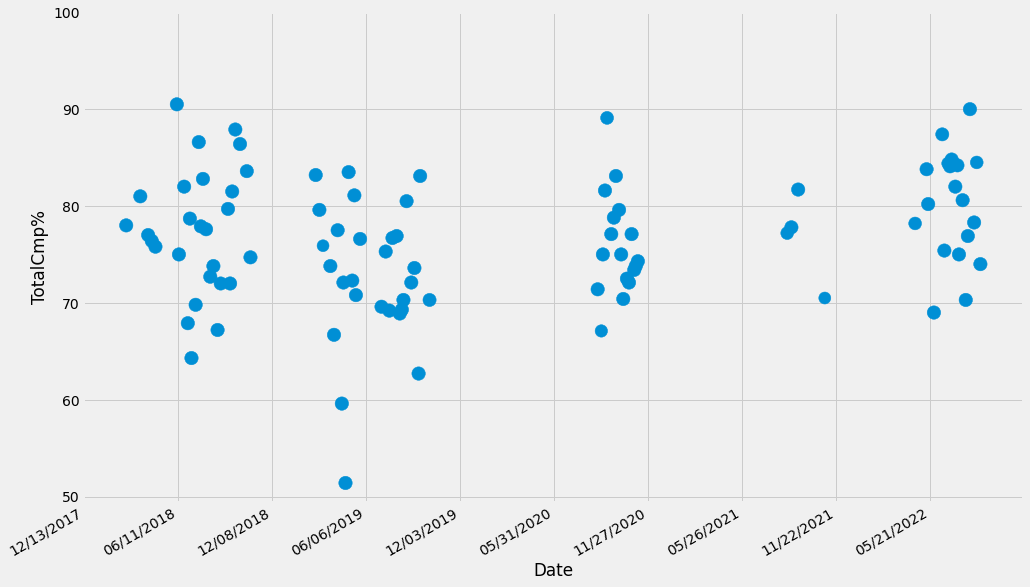

In [84]:
plt.rcParams["figure.figsize"] = (15,10)
lodeiro.plot.scatter("Date", "TotalCmp%", s=lodeiro["Min"]*2)
plt.yticks(np.arange(50, 101, 10.0))
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=180))
plt.gcf().autofmt_xdate()
plt.show()

In [85]:
lodeiro.columns

Index(['index', 'Date', 'Day', 'Comp', 'Round', 'Venue', 'Result', 'Squad',
       'Opponent', 'Start', 'Pos', 'Min', 'TotalCmp', 'TotalAtt', 'TotalCmp%',
       'TotalTotDist', 'TotalPrgDist', 'ShortCmp', 'ShortAtt', 'ShortCmp%',
       'MediumCmp', 'MediumAtt', 'MediumCmp%', 'LongCmp', 'LongAtt',
       'LongCmp%', 'Ast', 'xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog',
       'Match Report', 'Year'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a81b7ecaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a81c13e880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a81b7ecc10>],
 'medians': [<matplotlib.lines.Line2D at 0x1a81c13eee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a81b73f880>],
 'means': []}

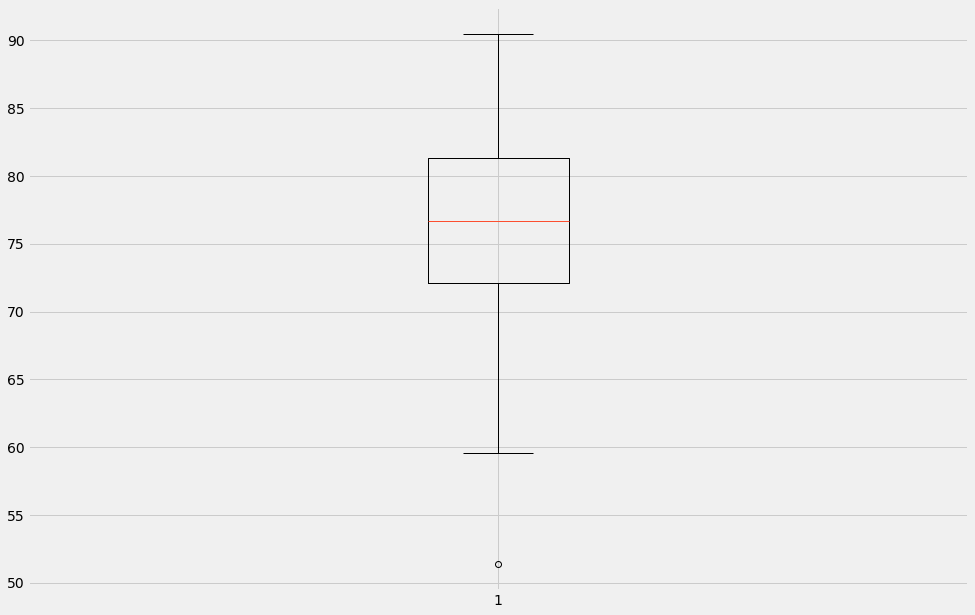

In [86]:
plt.boxplot(lodeiro["TotalCmp%"])

In [87]:
lodeiro.describe()

,index,Min,TotalCmp,TotalAtt,TotalCmp%,TotalTotDist,TotalPrgDist,ShortCmp,ShortAtt,ShortCmp%,...,LongCmp,LongAtt,LongCmp%,Ast,xA,KP,1/3,PPA,CrsPA,Prog
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,47.000000,88.957895,57.926316,75.347368,76.390526,1079.010526,349.021053,26.421053,30.421053,86.344211,...,8.621053,15.494737,55.394737,0.305263,0.340000,2.842105,6.621053,2.515789,0.621053,7.515789
std,27.568098,3.451536,15.977539,18.427990,6.744061,331.498612,115.805686,8.404126,9.130938,7.637070,...,3.946932,6.317611,15.685828,0.584802,0.325315,2.054138,3.046375,1.832700,0.774307,3.420412
min,0.000000,71.000000,19.000000,37.000000,51.400000,343.000000,109.000000,7.000000,11.000000,60.000000,...,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.500000,90.000000,47.000000,62.000000,72.100000,823.500000,274.000000,21.000000,24.500000,82.500000,...,6.000000,11.000000,45.250000,0.000000,0.100000,1.000000,5.000000,1.000000,0.000000,5.000000
50%,47.000000,90.000000,58.000000,77.000000,76.700000,1074.000000,336.000000,26.000000,30.000000,86.700000,...,8.000000,15.000000,56.300000,0.000000,0.300000,3.000000,6.000000,2.000000,0.000000,7.000000
75%,70.500000,90.000000,69.500000,89.000000,81.300000,1335.000000,416.500000,31.000000,36.000000,91.300000,...,11.500000,20.000000,63.600000,0.500000,0.500000,4.000000,8.000000,4.000000,1.000000,9.000000
max,94.000000,90.000000,93.000000,118.000000,90.500000,1773.000000,603.000000,48.000000,56.000000,100.000000,...,18.000000,30.000000,100.000000,3.000000,1.400000,9.000000,16.000000,8.000000,3.000000,18.000000


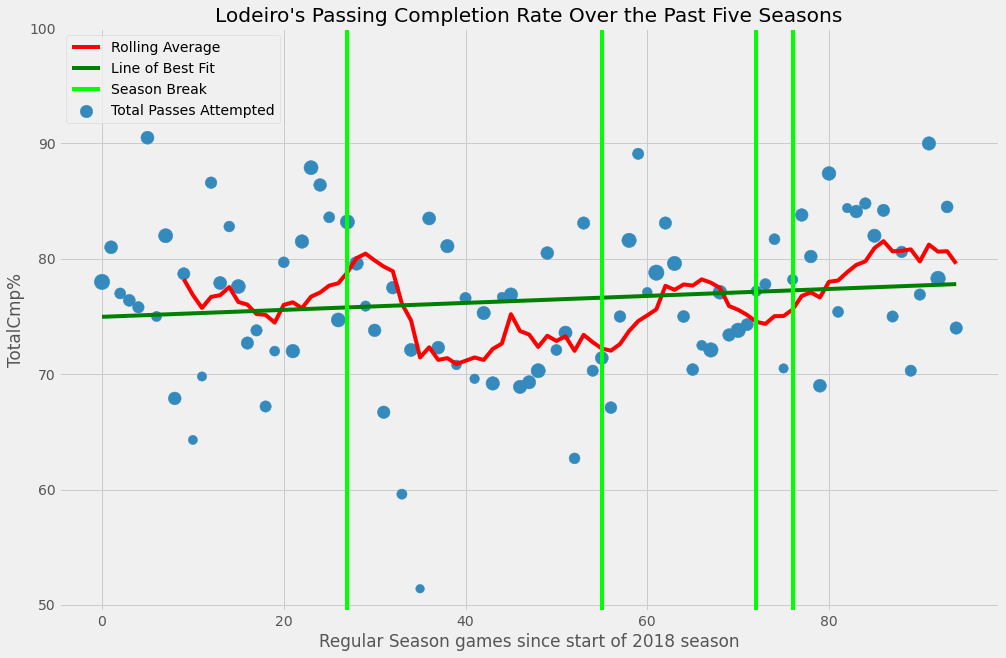

In [333]:
plt.rcParams["figure.figsize"] = (15,10)
a, b = np.polyfit(lodeiro["index"], lodeiro["TotalCmp%"], 1)
passing = lodeiro['TotalCmp%']
passingMod = lodeiro['TotalCmp%'] * lodeiro["TotalAtt"]/lodeiro["TotalAtt"].mean() # Add modifiers
p_average = passing.rolling(window=10).mean()
p_averageM = passingMod.rolling(window=7).mean()
lodeiro.plot.scatter("index", "TotalCmp%", s=lodeiro["TotalAtt"]*2, label = "Total Passes Attempted")
#plt.plot(lodeiro['TotalCmp%'], "k-", label = "Orig")
plt.plot(p_average, "r-", label = "Rolling Average")
#plt.plot(p_averageM, "g-", label = "Mod")
plt.plot(lodeiro["index"], a*lodeiro["index"]+b, "g-", label= "Line of Best Fit")
#27, 28, 17, 4, 19
plt.axvline(x = 27, color = 'lime', label = 'Season Break')
plt.axvline(x = 27+28, color = 'lime')
plt.axvline(x = 27+28+17, color = 'lime')
plt.axvline(x = 27+28+17+4, color = 'lime')
plt.title("Lodeiro's Passing Completion Rate Over the Past Five Seasons")
plt.xlabel("Regular Season games since start of 2018 season")
plt.legend()
plt.yticks(np.arange(50, 101, 10.0))
plt.show()

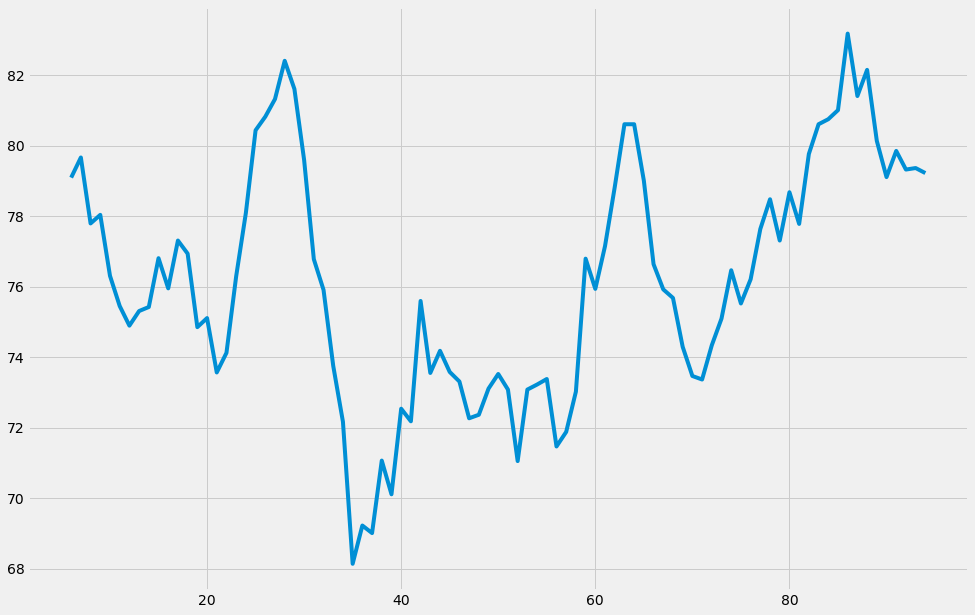

In [89]:
plt.plot(p_average)

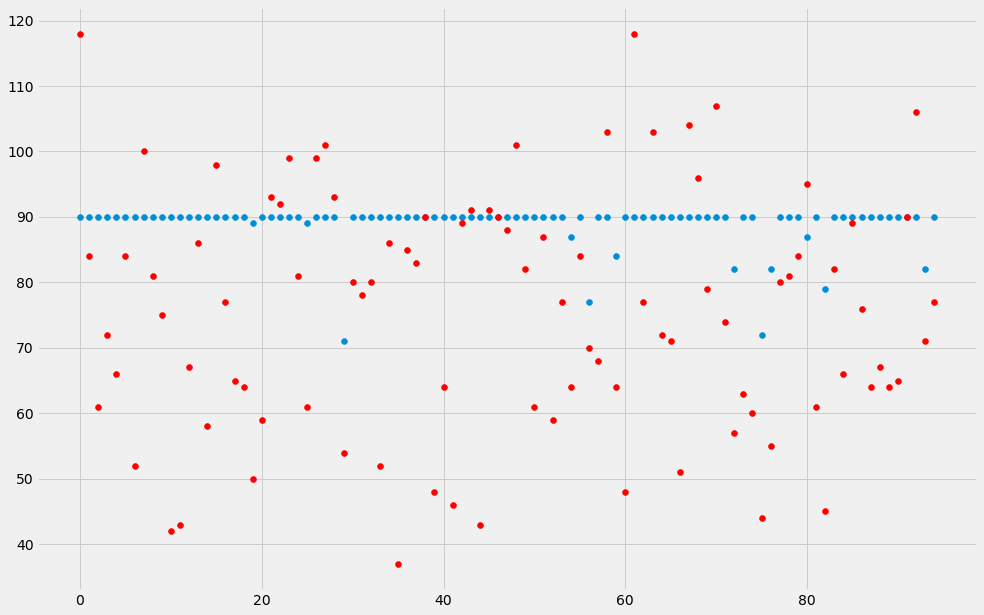

In [90]:
plt.scatter(lodeiro["index"], lodeiro["Min"])
plt.scatter(lodeiro["index"], lodeiro["TotalAtt"], c="red")
plt.show()

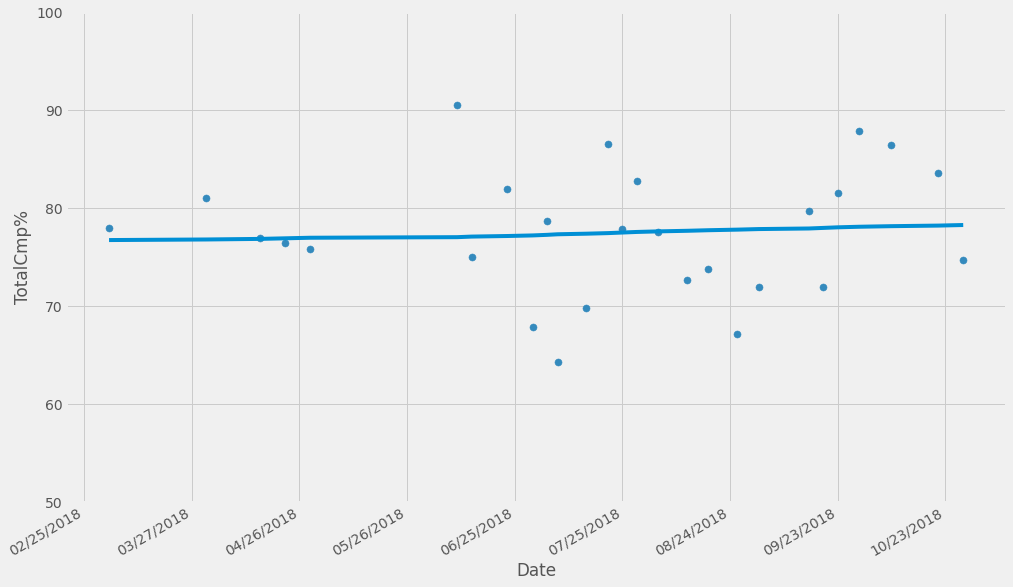

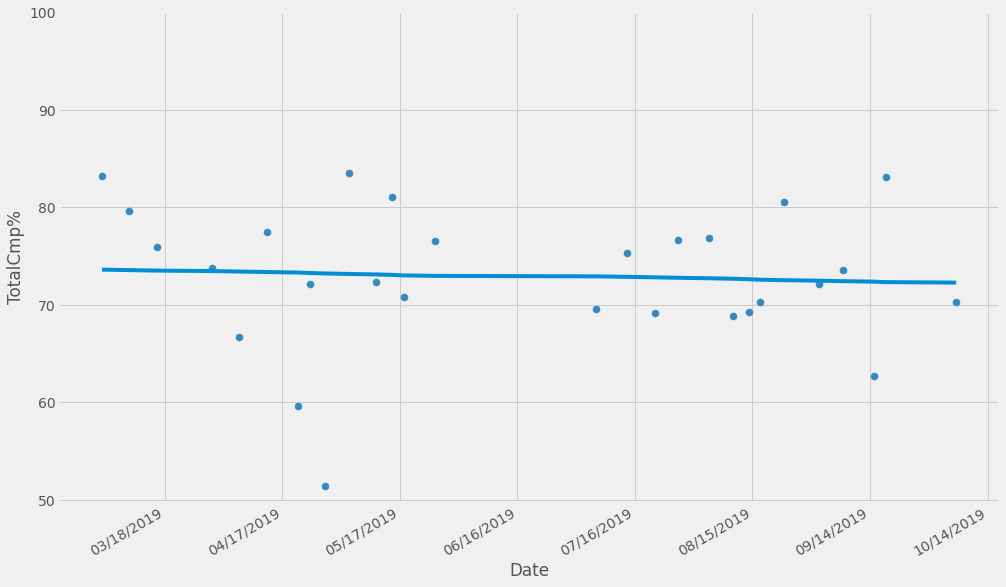

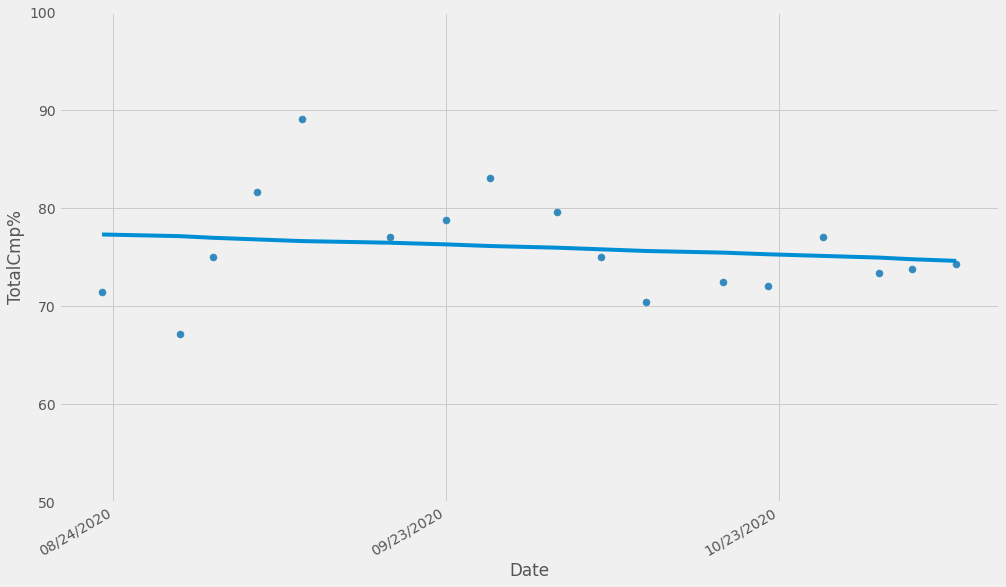

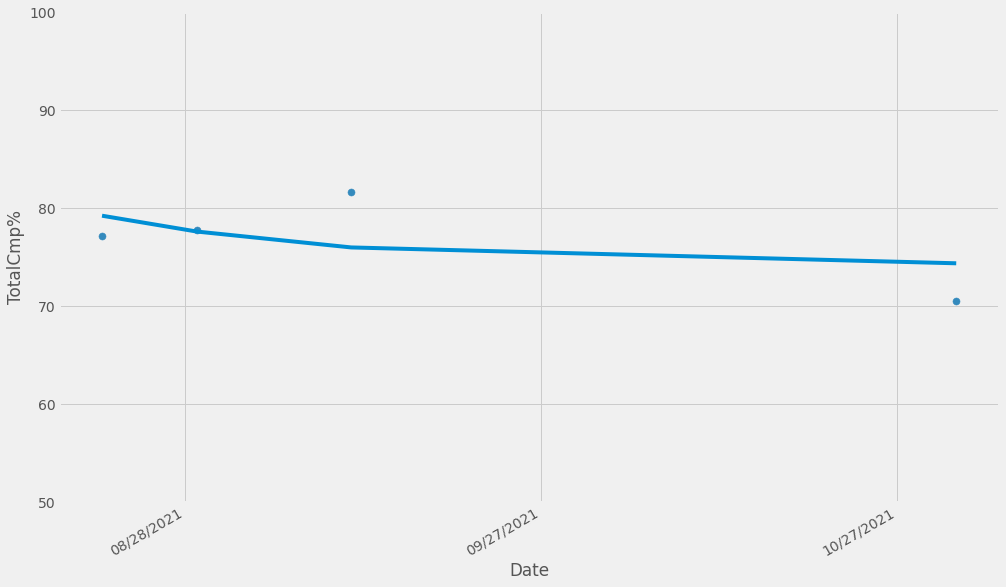

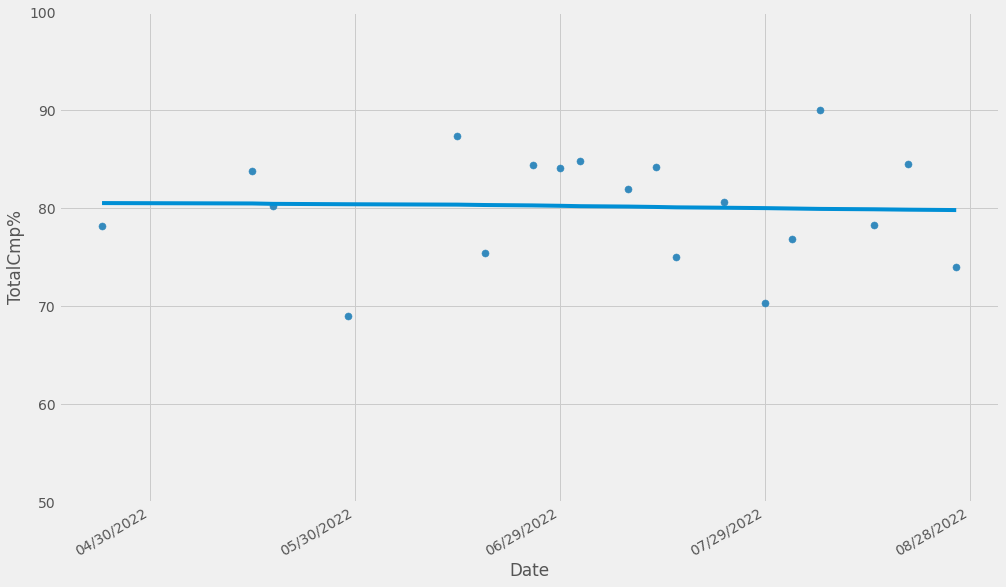

In [332]:
#fig, axs = plt.subplots(5, figsize=(10,6))
for a in range(5):
    years = ["2018","2019","2020","2021", "2022"]
    temp = lodeiro.loc[lodeiro["Year"] == years[a]]
    temp = temp.drop(columns=["index"]).reset_index()
    temp = temp.drop(columns=["index"]).reset_index()
    a, b = np.polyfit(temp["index"], temp["TotalCmp%"], 1)
    #lodeiro = lodeiro.loc[lodeiro["Min"]>89]
    temp.plot.scatter("Date", "TotalCmp%", s=50)
    plt.plot(temp["Date"], a*temp["index"]+b)
    plt.rcParams["figure.figsize"] = (15,10)
    plt.yticks(np.arange(50, 101, 10.0))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
    plt.gcf().autofmt_xdate()
    plt.show()

In [25]:
type(lodeiro["Date"][1])

datetime.datetime

In [69]:
temp = lodeiro.loc[lodeiro["Year"] == "2021"]
temp

,index,Date,Day,Comp,Round,Venue,Result,Squad,Opponent,Start,...,LongCmp%,Ast,xA,KP,1/3,PPA,CrsPA,Prog,Match Report,Year
66,66,2021-08-29 00:00:00,Sun,MLS,Regular Season,Home,L 0–2,Seattle,Portland Timbers,Y*,...,54.5,0.0,0.4,5.0,6.0,0.0,0.0,5.0,Match Report,2021
67,67,2021-09-11 00:00:00,Sat,MLS,Regular Season,Home,W 1–0,Seattle,Minnesota Utd,Y*,...,66.7,0.0,0.3,2.0,9.0,1.0,0.0,6.0,Match Report,2021


In [161]:
lodeiro["Year"].value_counts()
#27, 28, 17, 4, 19

2019    28
2018    27
2022    19
2020    17
2021     4
Name: Year, dtype: int64

In [100]:
lo18 = lodeiro.loc[lodeiro["Year"] == "2018"]
lo19 = lodeiro.loc[lodeiro["Year"] == "2019"]
lo20 = lodeiro.loc[lodeiro["Year"] == "2020"]
lo21 = lodeiro.loc[lodeiro["Year"] == "2021"]
lo22 = lodeiro.loc[lodeiro["Year"] == "2022"]

In [101]:
lo18.describe()

,index,Min,TotalCmp,TotalAtt,TotalCmp%,TotalTotDist,TotalPrgDist,ShortCmp,ShortAtt,ShortCmp%,...,LongCmp,LongAtt,LongCmp%,Ast,xA,KP,1/3,PPA,CrsPA,Prog
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,13.000000,89.925926,58.629630,75.074074,77.511111,1125.407407,360.518519,25.407407,29.666667,84.907407,...,9.481481,16.185185,58.429630,0.444444,0.37037,3.481481,6.777778,2.666667,0.592593,7.259259
std,7.937254,0.266880,17.045523,19.321025,6.525473,357.490749,122.398583,8.134727,9.051137,7.643294,...,4.282077,6.645050,12.758431,0.800641,0.28530,2.118969,3.297240,1.593255,0.572394,4.034396
min,0.000000,89.000000,27.000000,42.000000,64.300000,529.000000,158.000000,7.000000,11.000000,63.600000,...,3.000000,6.000000,36.800000,0.000000,0.00000,0.000000,2.000000,0.000000,0.000000,1.000000
25%,6.500000,90.000000,47.500000,61.000000,73.250000,888.000000,277.500000,21.500000,25.500000,81.800000,...,6.500000,11.000000,48.800000,0.000000,0.20000,2.000000,4.500000,1.000000,0.000000,5.500000
50%,13.000000,90.000000,56.000000,75.000000,77.600000,1095.000000,339.000000,26.000000,29.000000,85.200000,...,9.000000,16.000000,60.000000,0.000000,0.30000,3.000000,7.000000,2.000000,1.000000,7.000000
75%,19.500000,90.000000,72.000000,89.000000,81.750000,1430.000000,468.500000,31.000000,34.500000,90.000000,...,12.500000,20.500000,63.050000,1.000000,0.50000,5.000000,9.000000,4.000000,1.000000,9.500000
max,26.000000,90.000000,92.000000,118.000000,90.500000,1728.000000,599.000000,42.000000,48.000000,96.900000,...,18.000000,29.000000,81.800000,3.000000,1.30000,9.000000,14.000000,6.000000,2.000000,17.000000


In [104]:
lo19.describe()

,index,Min,TotalCmp,TotalAtt,TotalCmp%,TotalTotDist,TotalPrgDist,ShortCmp,ShortAtt,ShortCmp%,...,LongCmp,LongAtt,LongCmp%,Ast,xA,KP,1/3,PPA,CrsPA,Prog
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,40.500000,89.214286,55.357143,75.000000,72.950000,1070.357143,341.571429,23.571429,27.714286,84.332143,...,8.928571,17.142857,51.689286,0.250000,0.350000,2.964286,6.178571,2.178571,0.571429,7.500000
std,8.225975,3.614345,16.200627,18.505255,7.273468,336.204437,113.936444,7.833587,8.458426,8.223771,...,3.819333,6.287638,14.309058,0.440959,0.376632,2.219145,2.762897,1.743848,0.835711,3.666667
min,27.000000,71.000000,19.000000,37.000000,51.400000,343.000000,109.000000,9.000000,15.000000,60.000000,...,1.000000,7.000000,14.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.750000,90.000000,43.250000,60.500000,69.525000,774.250000,285.500000,19.750000,22.750000,81.575000,...,6.000000,12.750000,43.875000,0.000000,0.100000,1.000000,4.000000,1.000000,0.000000,5.000000
50%,40.500000,90.000000,61.500000,81.000000,72.950000,1118.500000,345.500000,22.000000,26.500000,84.200000,...,9.000000,15.500000,49.900000,0.000000,0.250000,2.000000,6.500000,2.000000,0.000000,7.000000
75%,47.250000,90.000000,66.250000,89.250000,77.050000,1331.000000,415.250000,29.000000,33.000000,88.575000,...,11.250000,22.000000,62.325000,0.250000,0.425000,4.000000,8.000000,3.000000,1.000000,9.250000
max,54.000000,90.000000,84.000000,101.000000,83.500000,1560.000000,545.000000,42.000000,49.000000,100.000000,...,17.000000,29.000000,80.000000,1.000000,1.400000,8.000000,11.000000,6.000000,3.000000,18.000000


In [106]:
lo20.describe()

,index,Min,TotalCmp,TotalAtt,TotalCmp%,TotalTotDist,TotalPrgDist,ShortCmp,ShortAtt,ShortCmp%,...,LongCmp,LongAtt,LongCmp%,Ast,xA,KP,1/3,PPA,CrsPA,Prog
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.00000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,63.000000,88.882353,62.176471,81.705882,75.964706,1106.117647,370.294118,32.000000,36.941176,86.552941,...,8.470588,15.352941,54.888235,0.294118,0.40000,2.588235,7.411765,3.176471,0.764706,8.058824
std,5.049752,3.388996,16.485734,20.287819,5.316594,306.086565,109.672675,9.205976,10.237618,6.793206,...,3.676235,6.402550,13.214144,0.469668,0.39211,2.093407,3.083400,1.975958,0.831370,2.860738
min,55.000000,77.000000,37.000000,48.000000,67.100000,587.000000,184.000000,17.000000,22.000000,72.400000,...,2.000000,6.000000,33.300000,0.000000,0.00000,0.000000,3.000000,0.000000,0.000000,4.000000
25%,59.000000,90.000000,51.000000,70.000000,72.500000,935.000000,295.000000,23.000000,29.000000,84.400000,...,7.000000,11.000000,50.000000,0.000000,0.20000,1.000000,5.000000,2.000000,0.000000,6.000000
50%,63.000000,90.000000,58.000000,77.000000,75.000000,1047.000000,344.000000,31.000000,36.000000,86.100000,...,9.000000,15.000000,56.300000,0.000000,0.30000,3.000000,7.000000,3.000000,1.000000,7.000000
75%,67.000000,90.000000,75.000000,103.000000,78.800000,1319.000000,439.000000,40.000000,44.000000,90.900000,...,10.000000,18.000000,58.300000,1.000000,0.50000,3.000000,9.000000,4.000000,1.000000,10.000000
max,71.000000,90.000000,93.000000,118.000000,89.100000,1773.000000,548.000000,48.000000,56.000000,100.000000,...,15.000000,30.000000,76.900000,1.000000,1.40000,7.000000,14.000000,8.000000,2.000000,14.000000


In [107]:
lo21.describe()

,index,Min,TotalCmp,TotalAtt,TotalCmp%,TotalTotDist,TotalPrgDist,ShortCmp,ShortAtt,ShortCmp%,...,LongCmp,LongAtt,LongCmp%,Ast,xA,KP,1/3,PPA,CrsPA,Prog
count,4.000000,4.000000,4.00,4.0000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.0,4.000000,4.000000,4.0,4.000000,4.000000,4.00,4.000000,4.0,4.000000
mean,73.500000,83.500000,43.25,56.0000,76.800000,679.500000,217.750000,24.500000,27.000000,90.725000,...,3.5,7.500000,38.625000,0.0,0.200000,2.000000,5.75,0.750000,0.0,5.250000
std,1.290994,8.544004,8.50,8.3666,4.649731,174.826581,65.728609,5.066228,5.477226,4.086054,...,3.0,3.109126,29.214537,0.0,0.182574,2.160247,2.50,0.957427,0.0,0.957427
min,72.000000,72.000000,31.00,44.0000,70.500000,472.000000,136.000000,17.000000,19.000000,86.700000,...,0.0,4.000000,0.000000,0.0,0.000000,0.000000,3.00,0.000000,0.0,4.000000
25%,72.750000,79.500000,40.75,53.7500,75.525000,567.250000,184.000000,23.750000,25.750000,88.800000,...,1.5,5.500000,24.975000,0.0,0.075000,0.750000,4.50,0.000000,0.0,4.750000
50%,73.500000,86.000000,46.50,58.5000,77.500000,702.000000,222.500000,26.500000,29.000000,89.900000,...,4.0,7.500000,43.900000,0.0,0.200000,1.500000,5.50,0.500000,0.0,5.500000
75%,74.250000,90.000000,49.00,60.7500,78.775000,814.250000,256.250000,27.250000,30.250000,91.825000,...,6.0,9.500000,57.550000,0.0,0.325000,2.750000,6.75,1.250000,0.0,6.000000
max,75.000000,90.000000,49.00,63.0000,81.700000,842.000000,290.000000,28.000000,31.000000,96.400000,...,6.0,11.000000,66.700000,0.0,0.400000,5.000000,9.00,2.000000,0.0,6.000000


In [108]:
lo22.describe()

,index,Min,TotalCmp,TotalAtt,TotalCmp%,TotalTotDist,TotalPrgDist,ShortCmp,ShortAtt,ShortCmp%,...,LongCmp,LongAtt,LongCmp%,Ast,xA,KP,1/3,PPA,CrsPA,Prog
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,85.000000,88.421053,60.000000,74.631579,80.163158,1085.684211,352.263158,27.473684,30.368421,90.242105,...,8.157895,13.894737,60.526316,0.263158,0.257895,2.157895,6.526316,2.578947,0.736842,7.894737
std,5.627314,3.420783,13.625956,14.859380,5.692023,302.983691,113.836551,7.486049,7.521898,6.724195,...,3.484301,5.043089,17.874247,0.561951,0.252357,1.462994,3.272247,2.090077,0.933459,2.884725
min,76.000000,79.000000,38.000000,45.000000,69.000000,667.000000,223.000000,17.000000,19.000000,73.100000,...,4.000000,6.000000,30.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
25%,80.500000,90.000000,49.000000,64.500000,76.150000,849.500000,281.500000,21.000000,26.000000,87.050000,...,5.500000,10.500000,47.750000,0.000000,0.050000,1.000000,4.500000,1.000000,0.000000,5.500000
50%,85.000000,90.000000,58.000000,76.000000,80.600000,1068.000000,311.000000,27.000000,30.000000,92.300000,...,7.000000,13.000000,60.900000,0.000000,0.200000,2.000000,6.000000,2.000000,0.000000,7.000000
75%,89.500000,90.000000,68.000000,83.000000,84.300000,1251.000000,395.500000,31.500000,35.500000,94.800000,...,9.500000,17.000000,71.600000,0.000000,0.450000,3.000000,8.000000,3.500000,1.000000,9.000000
max,94.000000,90.000000,83.000000,106.000000,90.000000,1691.000000,603.000000,44.000000,46.000000,100.000000,...,15.000000,23.000000,100.000000,2.000000,0.900000,5.000000,16.000000,8.000000,3.000000,14.000000


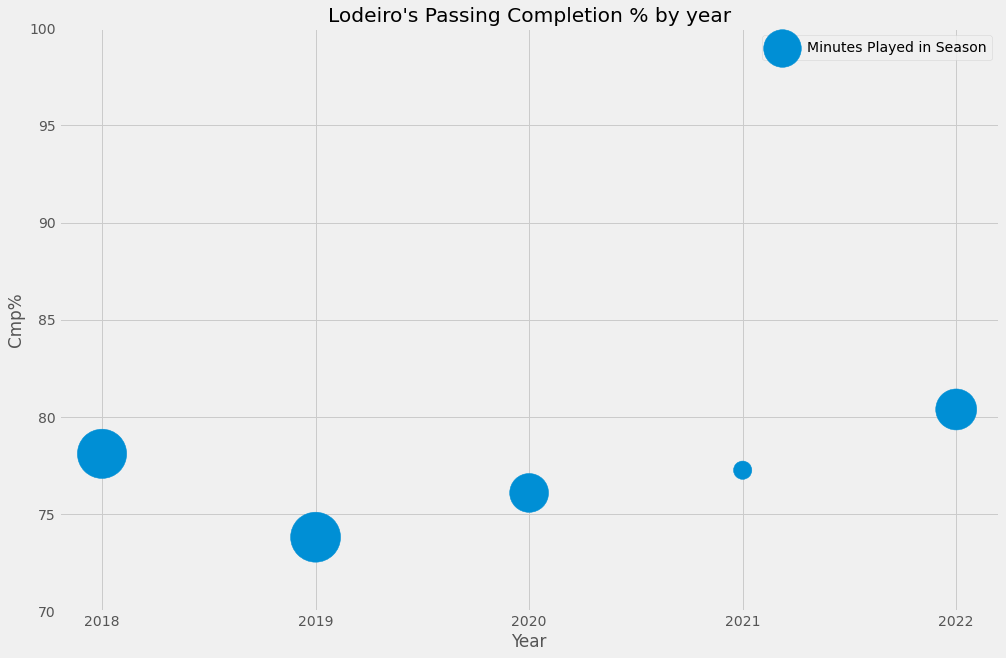

In [377]:
plt.scatter(["2018","2019","2020","2021","2022"],lodeiro.groupby("Year")["passComp"].sum(), s=lodeiro.groupby("Year")["Min"].sum(), label="Minutes Played in Season")

#a, b = np.polyfit([2018,2019,2020,2021,2022], lodeiro.groupby("Year")["TotalCmp%"].mean(), 1)
#plt.plot(["2018","2019","2020","2021","2022"], a*lodeiro.groupby("Year")["Year"].mean()+b)
plt.yticks(np.arange(70, 101, 5.0))
plt.title("Lodeiro's Passing Completion % by year")
plt.legend()
plt.ylabel("Cmp%")
plt.xlabel("Year")
plt.show()

In [376]:
#lodeiro.groupby("Year")["TotalCmp%"].mean()
lodeiro["passComp"] = (lodeiro["TotalCmp%"]*lodeiro["TotalAtt"])
for i in range(len(lodeiro["passComp"])):
    lodeiro["passComp"][i] = lodeiro["passComp"][i]/lodeiro.loc[lodeiro["Year"] == lodeiro["Year"][i]]["TotalAtt"].sum()

C:\Users\matan\AppData\Local\Temp/ipykernel_31888/2140609380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lodeiro["passComp"][i] = lodeiro["passComp"][i]/lodeiro.loc[lodeiro["Year"] == lodeiro["Year"][i]]["TotalAtt"].sum()


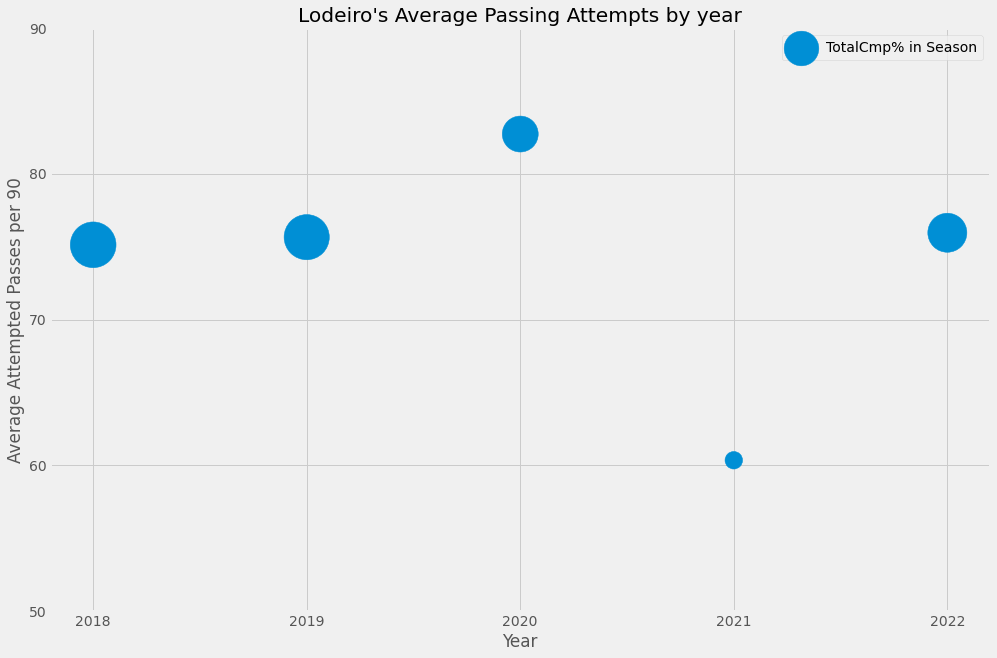

In [378]:
plt.scatter(["2018","2019","2020","2021","2022"],lodeiro.groupby("Year")["TotalAtt"].sum()*90/lodeiro.groupby("Year")["Min"].sum(), s=lodeiro.groupby("Year")["TotalCmp%"].sum(), label="TotalCmp% in Season")
#a, b = np.polyfit([2018,2019,2020,2021,2022], lodeiro.groupby("Year")["TotalAtt"].mean(), 1)
#plt.plot(["2018","2019","2020","2021","2022"], a*lodeiro.groupby("Year")["Year"].mean()+b)
plt.yticks(np.arange(50, 100, 10.0))
plt.title("Lodeiro's Average Passing Attempts by year")
plt.legend()
plt.ylabel("Average Attempted Passes per 90")
plt.xlabel("Year")
plt.show()

In [326]:
### print(type(lodeiro[headers[12]][3]))
print(lodeiro[headers[12]][5])

1.0


C:\Users\matan\AppData\Local\Temp/ipykernel_31888/1639864742.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


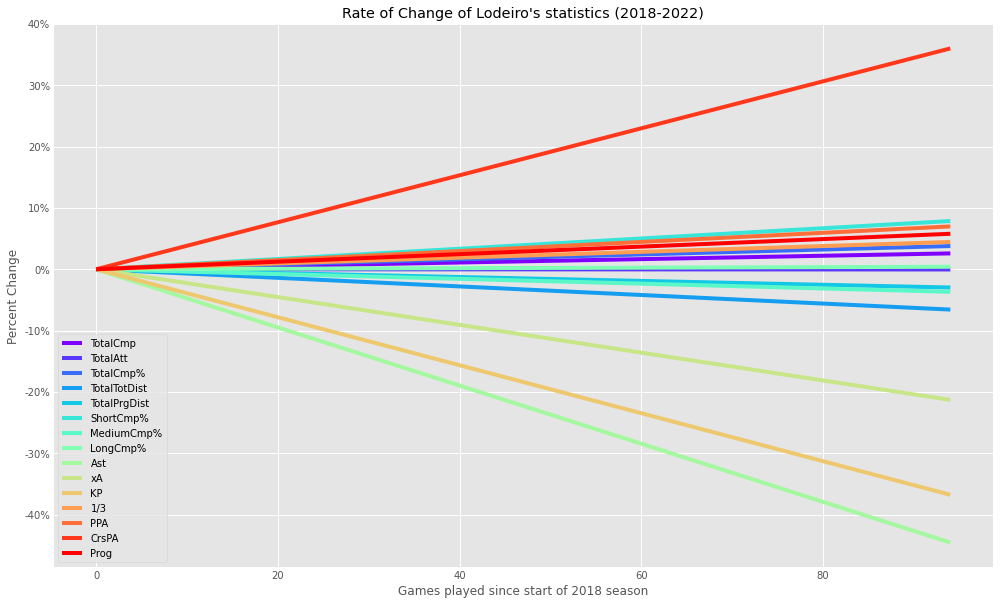

In [320]:
plt.rcParams["figure.figsize"] = (15,10)
#headers = lodeiro.columns
from matplotlib.pyplot import cm
#color = cm.rainbow(np.linspace(0, 1, len(headers)))
color = iter(cm.rainbow(np.linspace(0, 1, len(headers))))
#print(color[1])
headers = ['TotalCmp', 'TotalAtt', 'TotalCmp%',
       'TotalTotDist', 'TotalPrgDist','ShortCmp%', 'MediumCmp%',
       'LongCmp%', 'Ast', 'xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog']
for m in range(len(headers)):
    #print(type(lodeiro[headers[a]][1]))
    if isinstance(lodeiro[headers[m]][1], (int, float)):
        #lodeiro.plot.scatter("index", headers[a], label = headers[a])
        a, b = np.polyfit(lodeiro["index"], lodeiro[headers[m]], 1)
        a=a/b
        b = 0
        #a = (b-a*(len(lodeiro["index"]-1)))/b
        #b=0
        #a = (a/lodeiro[headers[m]].mean())
        c= next(color)
        #headers[a]
        if(a<5): #Need to normalize slopes, try manually calculating somehow
            #lodeiro.plot.scatter("index", headers[m], label = headers[m])
            plt.plot(lodeiro["index"], a*lodeiro["index"]+b, c=c, label= headers[m])
plt.xlabel("Games played since start of 2018 season")
plt.ylabel("Percent Change")
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.title("Rate of Change of Lodeiro's statistics (2018-2022)")
plt.legend()
plt.show()

In [199]:
lodeiro.columns

Index(['index', 'Date', 'Day', 'Comp', 'Round', 'Venue', 'Result', 'Squad',
       'Opponent', 'Start', 'Pos', 'Min', 'TotalCmp', 'TotalAtt', 'TotalCmp%',
       'TotalTotDist', 'TotalPrgDist', 'ShortCmp', 'ShortAtt', 'ShortCmp%',
       'MediumCmp', 'MediumAtt', 'MediumCmp%', 'LongCmp', 'LongAtt',
       'LongCmp%', 'Ast', 'xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog',
       'Match Report', 'Year'],
      dtype='object')

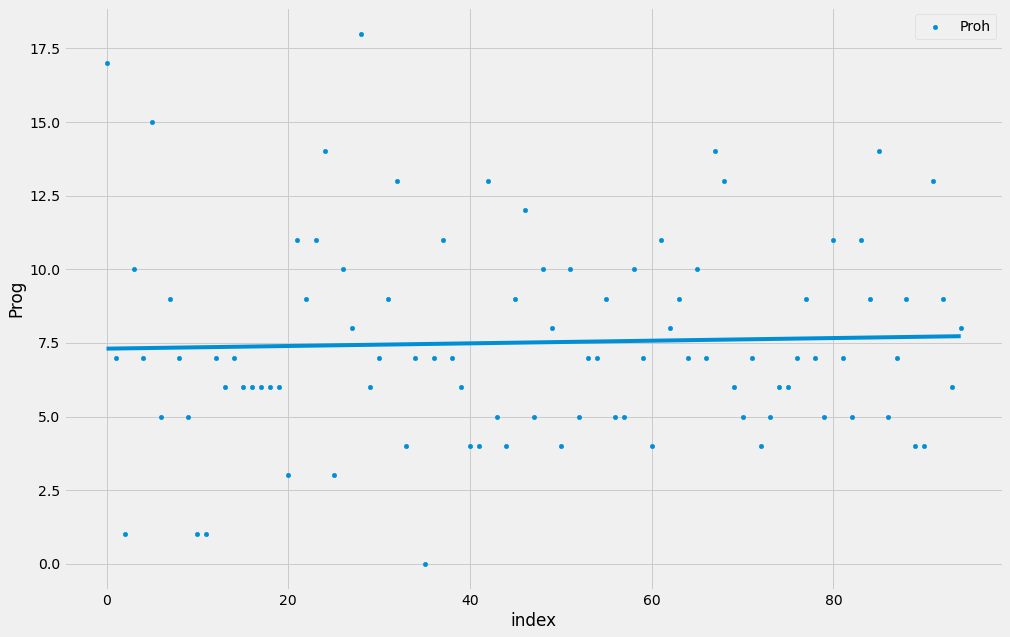

0.004493281075027915


In [277]:
lodeiro.plot.scatter("index", "Prog", label = "Proh")
a, b = np.polyfit(lodeiro["index"], lodeiro["Prog"], 1)
plt.plot(lodeiro["index"], a*lodeiro["index"]+b)
plt.show()
print(a)

In [380]:
lodeiro.groupby("Year")["passComp"].sum()

Year
2018    78.101233
2019    73.812714
2020    76.089129
2021    77.258036
2022    80.382934
Name: passComp, dtype: float64

In [278]:
lodeiro.columns

Index(['index', 'Date', 'Day', 'Comp', 'Round', 'Venue', 'Result', 'Squad',
       'Opponent', 'Start', 'Pos', 'Min', 'TotalCmp', 'TotalAtt', 'TotalCmp%',
       'TotalTotDist', 'TotalPrgDist', 'ShortCmp', 'ShortAtt', 'ShortCmp%',
       'MediumCmp', 'MediumAtt', 'MediumCmp%', 'LongCmp', 'LongAtt',
       'LongCmp%', 'Ast', 'xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog',
       'Match Report', 'Year'],
      dtype='object')

0.00027512417303645487
-4.086295123382788e-06
0.0004025957389676224
-0.0006992864507955641
-0.00031635225893174464
0.0008361143577995565
-0.000391069678483732
4.319663396433064e-05
-0.004740012117324214
-0.0022659721609134594
-0.00391122759485632
0.0004732934959964488
0.0007428094319523169
0.003829787234042551
0.0006151298958878168


C:\Users\matan\AppData\Local\Temp/ipykernel_31888/1539657146.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


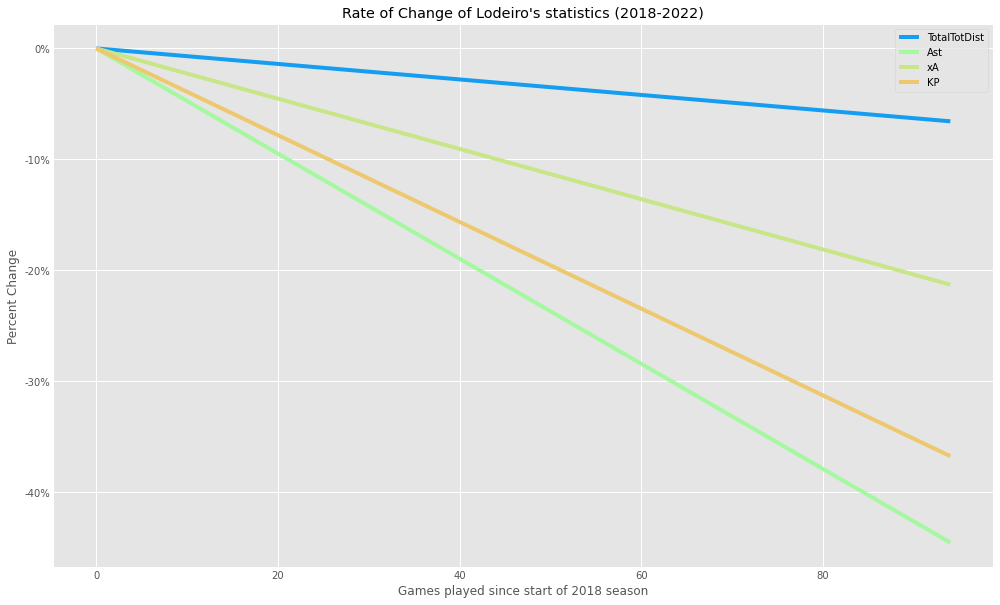

In [323]:
plt.rcParams["figure.figsize"] = (15,10)
#headers = lodeiro.columns
from matplotlib.pyplot import cm
#color = cm.rainbow(np.linspace(0, 1, len(headers)))
color = iter(cm.rainbow(np.linspace(0, 1, len(headers))))
#print(color[1])
headers = ['TotalCmp', 'TotalAtt', 'TotalCmp%',
       'TotalTotDist', 'TotalPrgDist','ShortCmp%', 'MediumCmp%',
       'LongCmp%', 'Ast', 'xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog']
for m in range(len(headers)):
    #print(type(lodeiro[headers[a]][1]))
    if isinstance(lodeiro[headers[m]][1], (int, float)):
        #lodeiro.plot.scatter("index", headers[a], label = headers[a])
        a, b = np.polyfit(lodeiro["index"], lodeiro[headers[m]], 1)
        a = a/b
        b = 0
#        a = (a/lodeiro[headers[m]].mean())
        c= next(color)
        #headers[a]
        print(a)
        if(a<(-.0005)): #Need to normalize slopes, try manually calculating somehow
            #lodeiro.plot.scatter("index", headers[m], label = headers[m])
            plt.plot(lodeiro["index"], a*lodeiro["index"]+b, c=c, label= headers[m])
plt.xlabel("Games played since start of 2018 season")
plt.ylabel("Percent Change")
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.title("Rate of Change of Lodeiro's statistics (2018-2022)")
plt.legend()
plt.show()

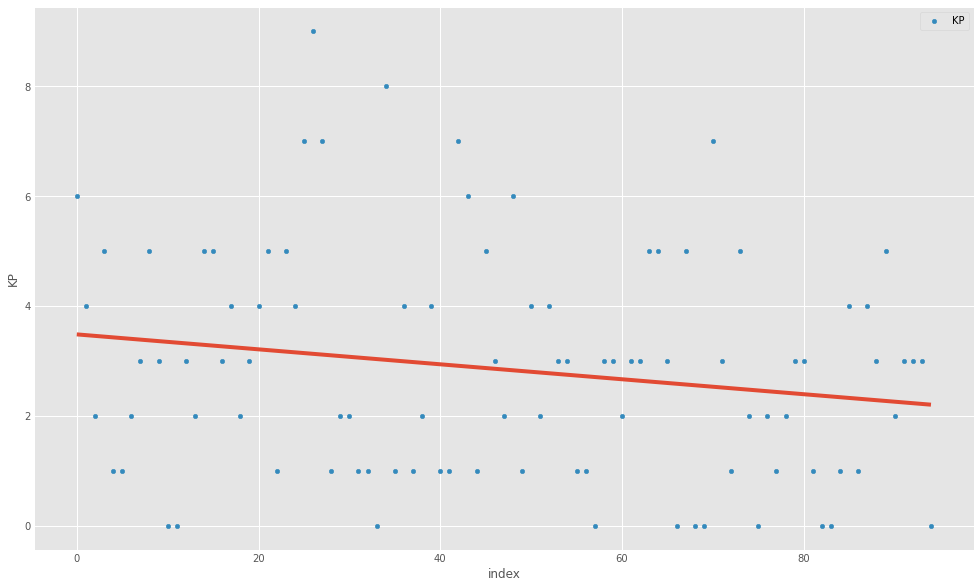

-0.013619820828667431


In [295]:
lodeiro.plot.scatter("index", "KP", label = "KP")
a, b = np.polyfit(lodeiro["index"], lodeiro["KP"], 1)
plt.plot(lodeiro["index"], a*lodeiro["index"]+b)
plt.show()
print(a)

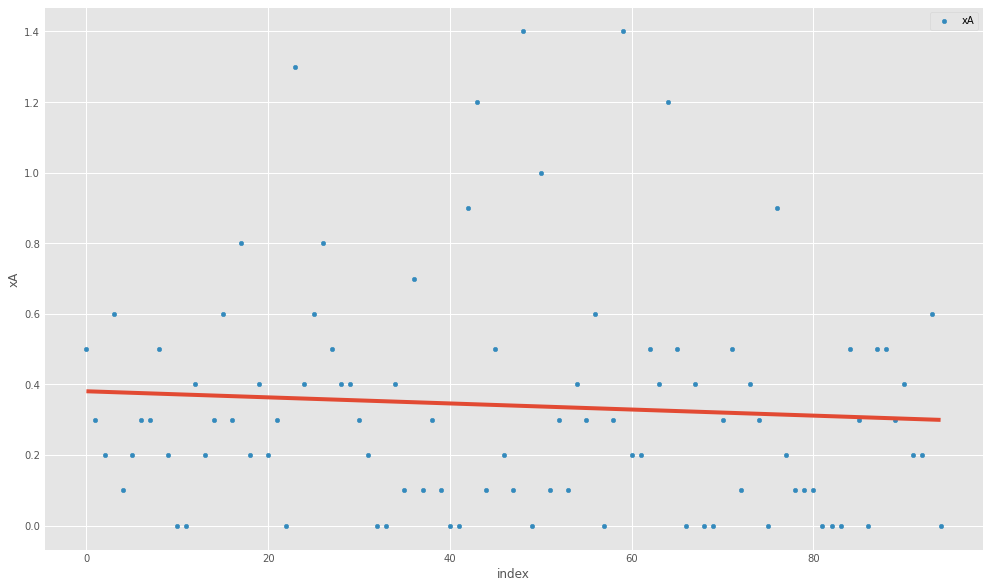

-0.0008622620380739109


In [299]:
lodeiro.plot.scatter("index", "xA", label = "xA")
a, b = np.polyfit(lodeiro["index"], lodeiro["xA"], 1)
plt.plot(lodeiro["index"], a*lodeiro["index"]+b)
plt.show()
print(a)

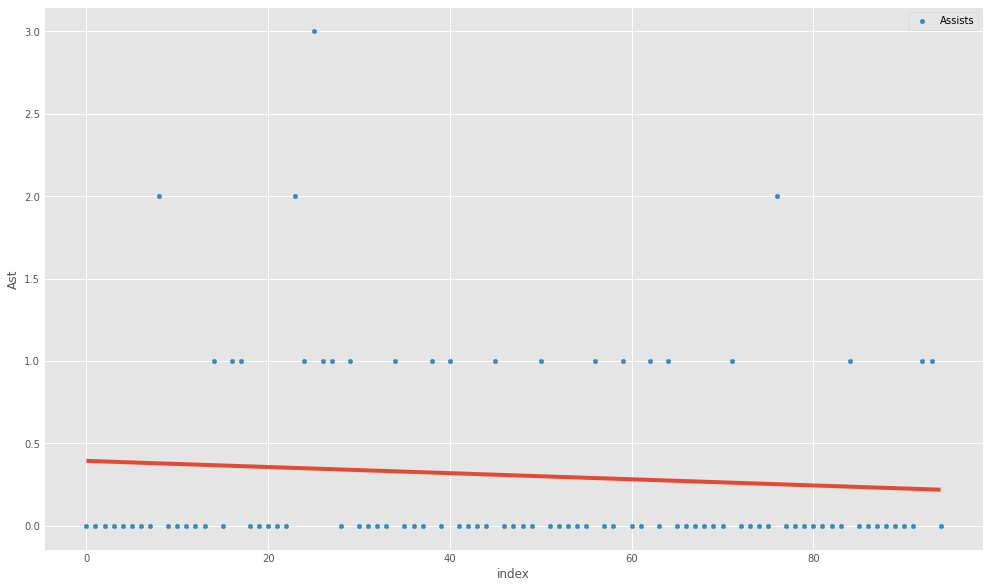

-0.0018617021276595748


In [300]:
lodeiro.plot.scatter("index", "Ast", label = "Assists")
a, b = np.polyfit(lodeiro["index"], lodeiro["Ast"], 1)
plt.plot(lodeiro["index"], a*lodeiro["index"]+b)
plt.show()
print(a)